<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3_01: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats as st


## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [3]:
# Read in the citibike data in the data folder in this repository.
bike_file = pd.read_csv('data/citibike_feb2014.csv')
bike_file.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [4]:
bike_file.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [5]:
bike_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [6]:
bike_file.replace({'\\N':np.nan}, inplace=True)
# bike_file = bike_file[pd.to_numeric(bike_file['birth year'], errors='coerce').notnull()]
bike_file['birth year']=pd.to_numeric(bike_file['birth year'])
bike_file.dropna
bike_file.head()

# there are lines with \N for birth year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991.0,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979.0,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948.0,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981.0,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990.0,1


In [7]:
bike_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               218019 non-null  float64
 14  gend

## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [8]:
bike_file.groupby(['gender']).mean()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year
gender,,,,,,,,,
0,1740.830932,453.425643,40.733101,-73.991709,482.502600,40.732713,-73.991763,18018.406180,1973.857143
1,814.032409,439.642965,40.735023,-73.990260,440.244366,40.734860,-73.990388,18012.187145,1975.259497
2,991.361074,435.025218,40.731774,-73.990706,436.083102,40.731746,-73.990884,18002.569059,1976.510981


Remember how to do ttest_ind

Null Hypothesis: Equal Average Trip Duration by Gender

Alternative Hypothesis: Unequal Average Trip Duration by Gender

Alpha = 0.05

If P<alpha then the observed effect is statistically significant and the null hypothesis can be ruled out or rejected and the alternative hypothesis is valid or accepted

Note:  Alpha, the significance level, is the probability that you will make the mistake of rejecting the null hypothesis when in fact it is true.  The p-value measures the probability of getting a more extreme value than the one you got from the experiment.  If the p-value is greater than alpha, you accept the null hypothesis.   If it is less than alpha, you reject the null hypothesis.    



Source: https://www.spcforexcel.com/knowledge/basic-statistics/interpretation-alpha-and-p-value#:~:text=Alpha%2C%20the%20significance%20level%2C%20is,you%20accept%20the%20null%20hypothesis.

In [9]:
st.ttest_ind(bike_file[bike_file['gender']==1]['tripduration'],bike_file[bike_file['gender']==2]['tripduration'])
# What is 0 gender

Ttest_indResult(statistic=-5.929304472651931, pvalue=3.046762685660303e-09)

Our p-value is 3.04 e-09 (very very small) which is smaller than 0.05. We reject null hypothesis and thus acept alternate hypothesis. Thus we can conclude that the alternative hypothesis is true and there is an unequal average trip for gender=1 and gender=2. 

This means that gender is a significant predictor of tripduration. **IMPORTANT**

## What numeric columns shouldn't be treated as numeric?

**Answer:**

Start station id, end station id the latitudes and longtitudes

Because their averages have no meaning. They are categorical in nature.

## Dummify the `start station id` Variable

In [10]:
len(set(bike_file['start station id']))
# this calculates the number of unique values

329

In [11]:
# bike_file = pd.get_dummies(bike_file, columns=['start station id'])
# print(len(bike_file.columns))
# 343

In [12]:
bike_file = pd.get_dummies(bike_file, columns=['start station id'], drop_first=True) # drop_first seems very important
print(len(bike_file.columns))
bike_file.head()

342


,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2006,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0


## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [13]:
bike_file['age'] = 2014 - bike_file['birth year']
bike_file['age']

0         23.0
1         35.0
2         66.0
3         33.0
4         24.0
          ... 
224731    38.0
224732    29.0
224733    46.0
224734    32.0
224735    54.0
Name: age, Length: 224736, dtype: float64

In [14]:
bike_file.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,23.0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,35.0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,66.0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,33.0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,24.0


## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [15]:
bike_file=pd.get_dummies(bike_file, columns=['usertype'],drop_first=True)

In [16]:
print(len(bike_file.columns))

343


In [17]:
bike_file.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age,usertype_Subscriber
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,23.0,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,35.0,1
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,66.0,1
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,33.0,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,24.0,1


In [18]:
bike_file.drop(['starttime','stoptime','start station name','start station latitude','start station longitude','end station id','end station name','birth year','bikeid','end station latitude','end station longitude'], axis=1, inplace=True)

In [19]:
bike_file.head()

,tripduration,gender,start station id_79,start station id_82,start station id_83,start station id_116,start station id_119,start station id_120,start station id_127,start station id_128,...,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age,usertype_Subscriber
0,382,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23.0,1
1,372,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35.0,1
2,591,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,66.0,1
3,583,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33.0,1
4,223,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24.0,1


In [20]:
# y = bike_file['tripduration']

In [21]:
# X = bike_file.drop(['tripduration'], axis=1, inplace=True)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(bike_file.dropna().drop(columns=['tripduration']),bike_file.dropna()['tripduration'], test_size=0.2, random_state = 123)

In [23]:
X_train.head()

,gender,start station id_79,start station id_82,start station id_83,start station id_116,start station id_119,start station id_120,start station id_127,start station id_128,start station id_137,...,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age,usertype_Subscriber
147618,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35.0,1
43852,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49.0,1
21811,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27.0,1
142383,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29.0,1
50231,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29.0,1


In [24]:
X_test.shape

(43604, 331)

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [25]:
# Instantiate The Model
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
preds = lr.predict(X_test)
preds
# predicted values based on the linear regression model

array([3193.69125736,  644.34769809,  830.66720199, ...,  689.46025445,
        844.93316126, 1173.40507371])

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

I need to apply MSE on the model.

The value differ greatly from the solutions when i did not apply drop_first to the get_dummies dataset 


MSE and $R^2$ for Trained Data

In [28]:
mean_squared_error(y_train, lr.predict(X_train)) # error between trained y data and the predicted values for the trained x data based on regression model

33236295.991138194

In [29]:
r2_score(y_train, lr.predict(X_train)) # R^2 score of fit between trained y data and the predicted values for the trained x data based on regression model

0.003732147945244124

MSE and $R^2$ for Test Data

In [30]:
mean_squared_error(y_test, lr.predict(X_test)) # error between test y dataset and the predicted values for the test x dataset based on regression model

16855069.419826765

In [31]:
r2_score(y_test, lr.predict(X_test)) # R^2 score of fit between test y data and the predicted values for the test x data based on regression model

-0.004823021824723384

In [32]:
y_test

103744    18133
190165      697
145693      801
92348      1224
134487      239
          ...  
96083       296
219059      149
215369      411
156105     1337
217437      372
Name: tripduration, Length: 43604, dtype: int64

In [39]:
preds

array([3193.69125736,  644.34769809,  830.66720199, ...,  689.46025445,
        844.93316126, 1173.40507371])

In [33]:
print([0, max(max(y_test),max(preds))])

[0, 590196]


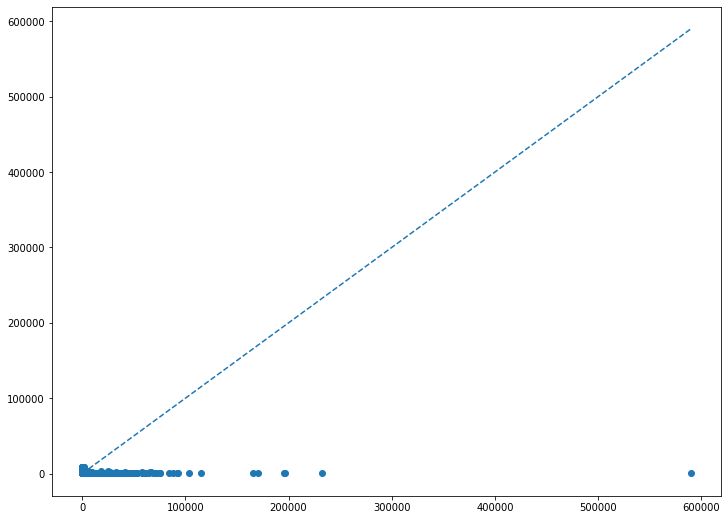

In [34]:
plt.figure(figsize = (12, 9))

plt.scatter(y_test, lr.predict(X_test))

plt.plot([0, max(max(y_test),max(preds))],
        [0, max(max(y_test),max(preds))],    
         linestyle = '--')

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

### **REMEMBER THIS PART**

In [35]:
import statsmodels.api as sm


In [36]:
# Remember, we need to add a constant in statsmodels!
X_train = sm.add_constant(X_train)

First, we always need to add the constant. The reason for this is that it takes care of the bias in the data (a constant difference which is there for all observations). 

Source: https://365datascience.com/question/is-it-mandatory-to-use-statsmodel-add_constant-method-while-implementing-linear-regression-model-cant-be-directly-put-the-coef_-nd-intercept_-value-directly-in-the-equation-ymxb-also-what-is/

In [37]:
model_sm = sm.OLS(y_train, X_train).fit()

In [40]:
model_sm

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [38]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.976
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           2.64e-23
Time:                        22:09:34   Log-Likelihood:            -1.7578e+06
No. Observations:              174415   AIC:                         3.516e+06
Df Residuals:                  174084   BIC:                         3.520e+06
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
gender                  178.9245     35.542      5.034      0.000     109.263     248.586
start station id_79      20.4768    361.912      0.057      0.955    -688.863     729.816
start station id_82    -455.1307    477.240     -0.954      0.340   -1390.511     480.250
start station id_83    -218.9387    461.841     -0.474      0.635   -1124.136     686.259
start station id_116   -405.8722    309.906     -1.310      0.190   -1013.280     201.536
start station id_119   -347.9569    936.814     -0.371      0.710   -2184.091    1488.178
start station id_120    897.8401    717.844      1.251      0.211    -509.117    2304.798
start station id_127   -355.4668    326.278     -1.089      0.276    -994.965     284.031
start station id_128   -359.5798    322.725     -1.114      0.265    -992.113     272.954
start station id_137   -379.0678    387.621     -0.978      0.328   -1138.797     380.661
start station id_143   -359.2094    541.642     -0.663      0.507   -1420.816     702.397
start station id_144   -146.8196    754.903     -0.194      0.846   -1626.413    1332.774
start station id_146   -473.3493    380.990     -1.242      0.214   -1220.082     273.383
start station id_147    -60.8850    334.087     -0.182      0.855    -715.688     593.918
start station id_150    136.6086    376.197      0.363      0.717    -600.729     873.946
start station id_151   -412.1857    298.295     -1.382      0.167    -996.836     172.465
start station id_152   -449.3211    421.209     -1.067      0.286   -1274.881     376.239
start station id_153   -379.8976    327.232     -1.161      0.246   -1021.265     261.469
start station id_157    146.4076    443.749      0.330      0.741    -723.331    1016.147
start station id_160   -280.2529    366.384     -0.765      0.444    -998.358     437.852
start station id_161   -453.7822    316.617     -1.433      0.152   -1074.344     166.780
start station id_164   -280.4457    359.974     -0.779      0.436    -985.986     425.095
start station id_167   -269.9957    334.759     -0.807      0.420    -926.116     386.125
start station id_168   -322.8253    309.416     -1.043      0.297    -929.274     283.623
start station id_173   -378.8441    331.655     -1.142      0.253   -1028.881     271.193
start station id_174    316.0947    343.506      0.920      0.357    -357.169     989.358
start station id_195    397.4999    355.838      1.117      0.264    -299.935    1094.935
start station id_212   -302.5893    329.713     -0.918      0.359    -948.820     343.641
start station id_216   -245.3537    799.650     -0.307      0.759   -1812.649    1321.942
start station id_217    -82.6458    726.507     -0.114      0.909   -1506.583    1341.292
start station id_218    267.1461    776.133      0.344      0.731   -1254.056    1788.348
start station id_223   

Null Hypothesis: Equal average trip duration by age
Alternative Hypothesis: Unequal average trip duration by age

We will let ${alpha}$ = 0.05

The p-value for age is less than 0.001 which is much smaller than alpha of 0.05. Thus we can reject the null hypothesis and accept that age is a significant predictor of trip duration.

Source: https://www.spcforexcel.com/knowledge/basic-statistics/interpretation-alpha-and-p-value#:~:text=Alpha%2C%20the%20significance%20level%2C%20is,you%20accept%20the%20null%20hypothesis.

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

Based on both hypothesis tests, age and gender are significant predictors of tripduration. The correlation coefficients for both age and gender are positive, which implies that there is a positive correlation between age/gender with tripduration.

Target market would be older patrons whose gender=2.